<a href="https://colab.research.google.com/github/cyberdreams8/water-quality-analysis-and-prediction-2/blob/main/PDS_waterquality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing the necessary liabraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Reading the Dataset

In [6]:
Dataset = pd.read_csv("https://raw.githubusercontent.com/cyberdreams8/water-quality-analysis-and-prediction-2/refs/heads/main/water_quality_dataset.csv")
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


In [7]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'Potability'],
      dtype='object')

In [8]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


In [9]:
Dataset.head()

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable


In [10]:
Dataset.tail()

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.2,7.9,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.3,7.4,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.3,7.3,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.2,7.6,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable
6315,987,2535.0,VISVA BHARATI,WEST BENGAL,30.0,31.0,7.9,8.2,370.0,437.0,2021,0.678409,4.987829,5.729190,578.810775,51.550765,Not Drinkable


##Sanity Check of Data

In [11]:
Dataset.shape

(6316, 17)

In [12]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6316 entries, 0 to 6315
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   6316 non-null   int64  
 1   Station Code                 6240 non-null   float64
 2   Station Name                 6267 non-null   object 
 3   STATE                        6241 non-null   object 
 4   Temperature Min              5818 non-null   float64
 5   Temperature Max              5818 non-null   float64
 6   pH Min                       6195 non-null   float64
 7   pH Max                       6195 non-null   float64
 8   Conductivity (µmhos/cm) Min  6124 non-null   float64
 9   Conductivity (µmhos/cm) Max  6124 non-null   float64
 10  Year                         6316 non-null   int64  
 11  Turbidity (NTU)              6255 non-null   float64
 12  Dissolved Oxygen (mg/L)      6253 non-null   float64
 13  BOD (mg/L)        

In [13]:
#finding missing values
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [14]:
#finding missing values in percentage
Dataset.isnull().sum()/Dataset.shape[0]*100

,0
Unnamed: 0,0.000000
Station Code,1.203293
Station Name,0.775807
STATE,1.187460
Temperature Min,7.884737
Temperature Max,7.884737
pH Min,1.915769
pH Max,1.915769
Conductivity (µmhos/cm) Min,3.039899
Conductivity (µmhos/cm) Max,3.039899


In [15]:
#finding duplicates
Dataset.duplicated().sum()

0

In [16]:
#identifying garbage values
for i in Dataset.select_dtypes(include='object').columns:
  print(Dataset[i].value_counts())
  print("***"*10)

Station Name
BEGUSARAI                                                                                    10
PATNA                                                                                        10
FULBARI BARRAGE                                                                               9
NANGAL, PUNJAB                                                                                9
VISVA BHARATI                                                                                 9
                                                                                             ..
HAND PUMP WATER NEAR D.M OFFICE, MADHEPURA                                                    1
HAND PUMP WATER AT COLLECTRIATE OFFICE, MADHUBANI                                             1
TAP WATER INSIDE THE CAMPUS OF TOURIST CAFETERIA,\nNALANDA                                    1
HAND PUMP WATER AT CIVIL COURT, NALANDA                                                       1
GROUND WATER AT BHAGWAN\nIN

##Exploratory Data Analysis (EDA)

In [17]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'Potability'],
      dtype='object')

In [18]:
#descriptive statistics
columns= ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)']
selected_data = Dataset[columns]
selected_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature Min,5818.0,25.243589,4.694067,0.000000,23.000000,26.000000,28.000000,67.000000
Temperature Max,5818.0,27.175799,4.515805,0.000000,25.000000,28.000000,30.000000,70.000000
pH Min,6195.0,7.155052,0.698224,0.000000,6.900000,7.200000,7.600000,9.600000
pH Max,6195.0,7.631516,8.849163,4.600000,7.200000,7.510000,7.900000,702.000000
Conductivity (µmhos/cm) Min,6124.0,1303.856199,3102.087896,0.000000,294.000000,680.000000,1338.500000,72683.000000
Conductivity (µmhos/cm) Max,6124.0,1728.061300,3725.717739,0.000000,415.750000,895.000000,1748.250000,87790.000000
Turbidity (NTU),6255.0,7.039597,4.422660,0.082832,2.939743,6.841050,10.944093,14.803304
Dissolved Oxygen (mg/L),6253.0,7.468643,2.875296,2.136340,5.182620,7.811954,10.059789,11.946842
BOD (mg/L),6259.0,3.725973,2.437790,0.014496,1.445302,3.481846,5.852835,7.968710
TDS (mg/L),6253.0,1087.243968,589.160839,110.759701,529.066337,1043.741646,1678.590777,1979.440543


In [19]:
selected_data2 = Dataset[['STATE','Potability']]
selected_data2.describe().T

,count,unique,top,freq
STATE,6241,53,RAJASTHAN,585
Potability,6316,2,Not Drinkable,6047


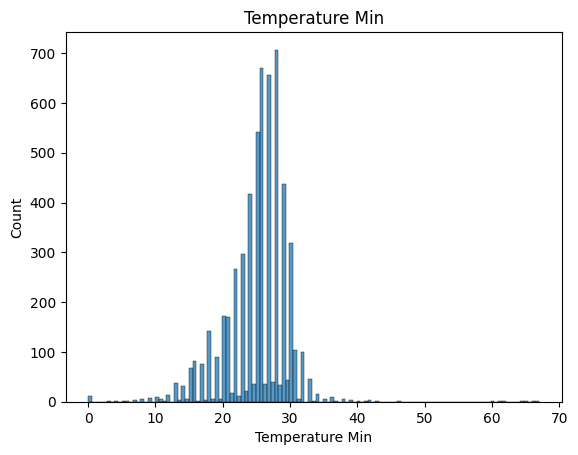

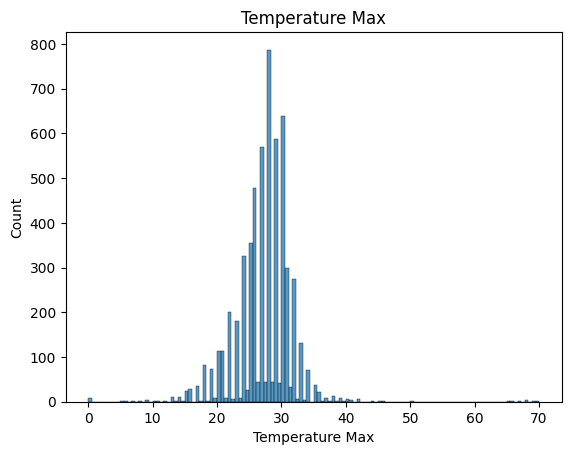

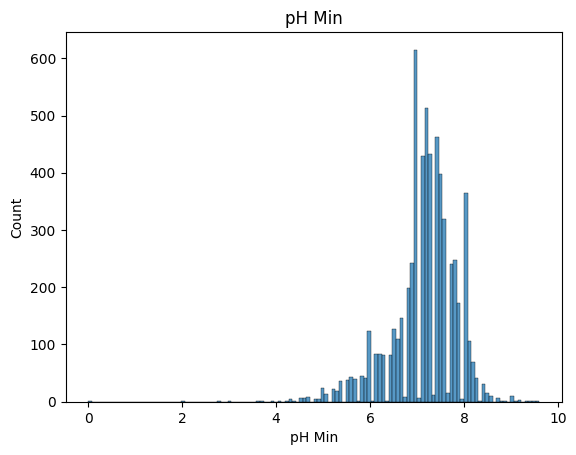

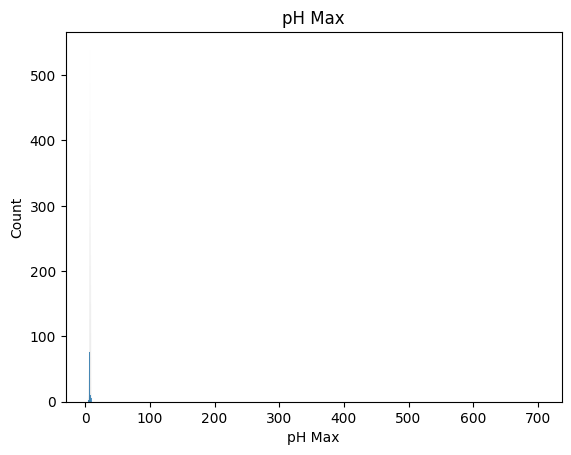

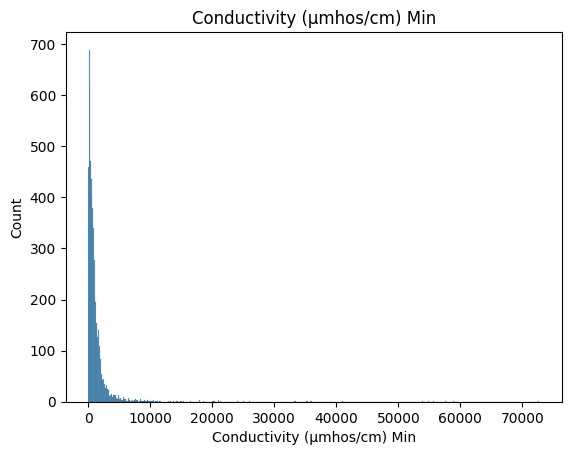

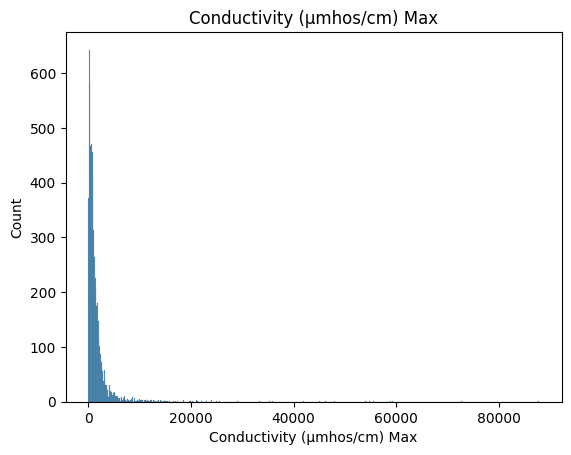

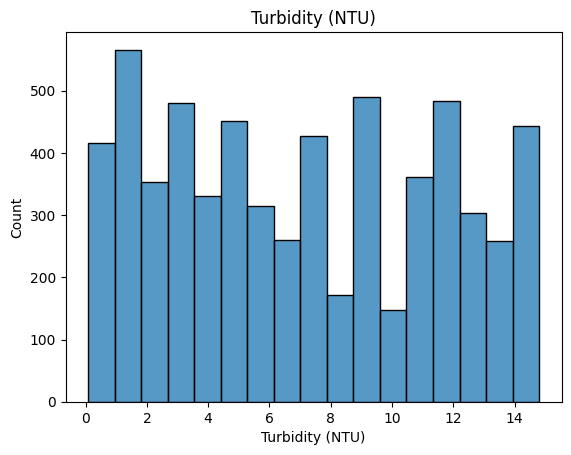

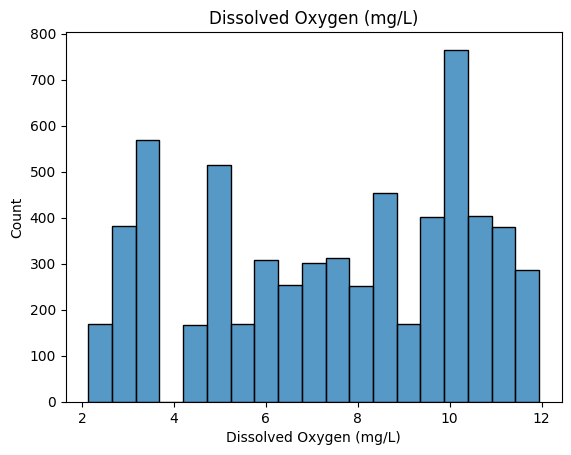

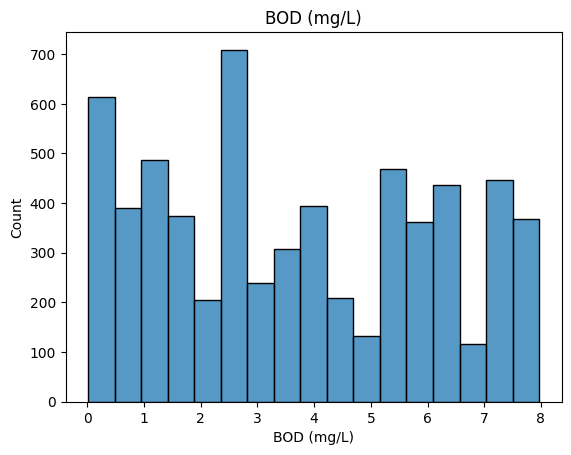

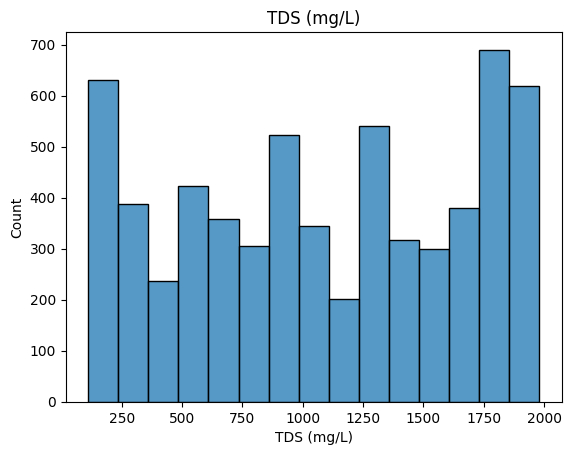

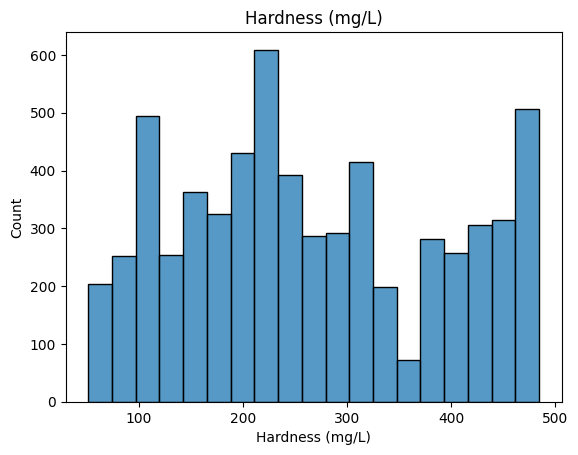

In [20]:
#histograms to understand the distribution
for i in selected_data.columns:
  sns.histplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()


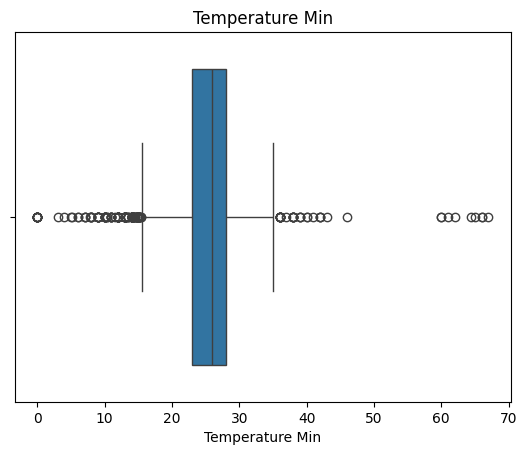

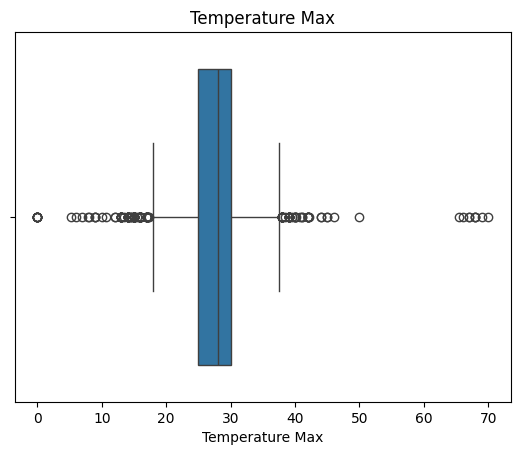

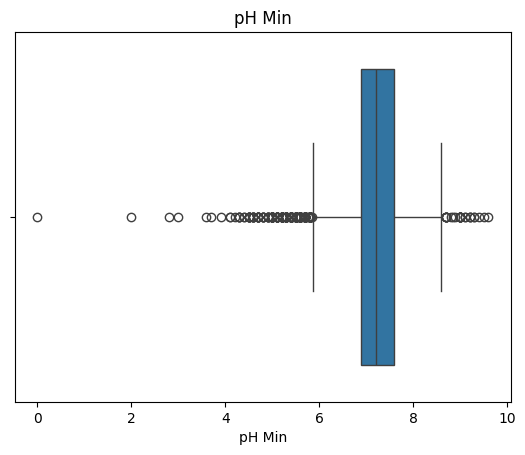

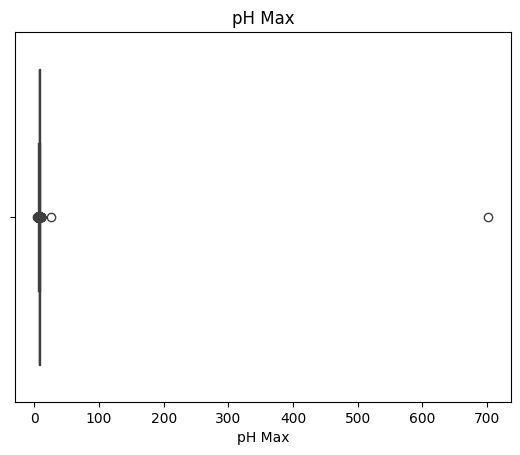

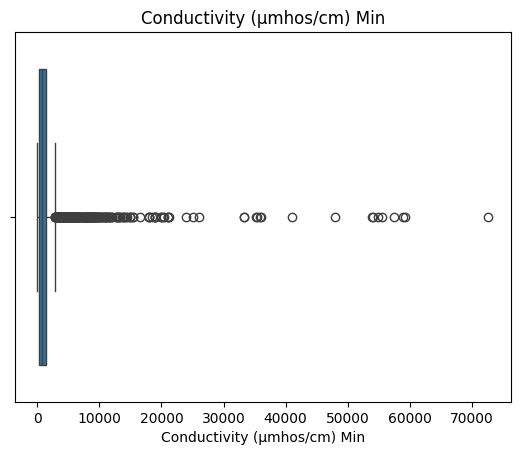

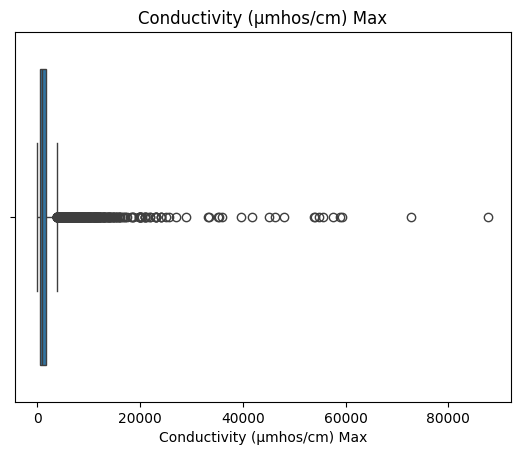

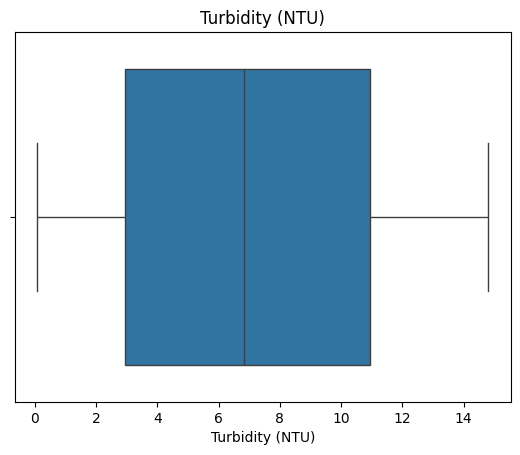

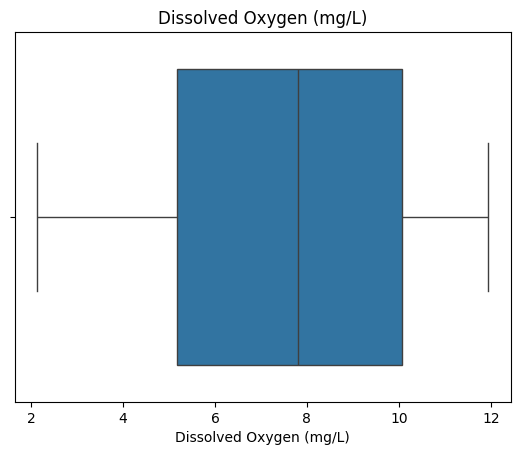

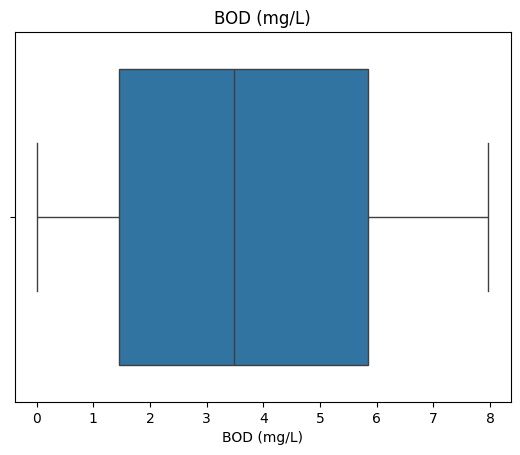

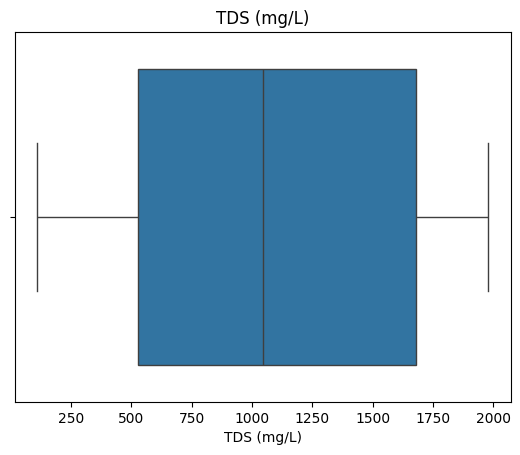

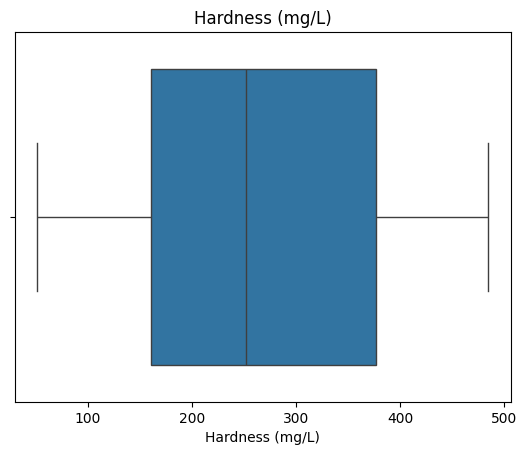

In [21]:
#Boxplot to identify Outliers
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

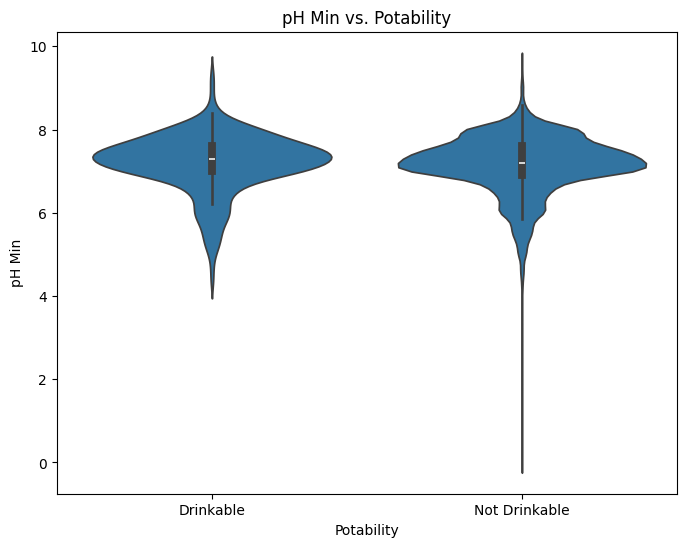

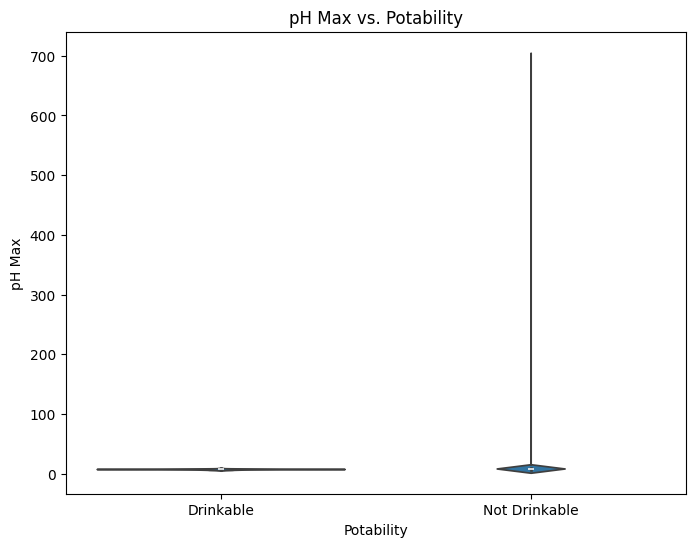

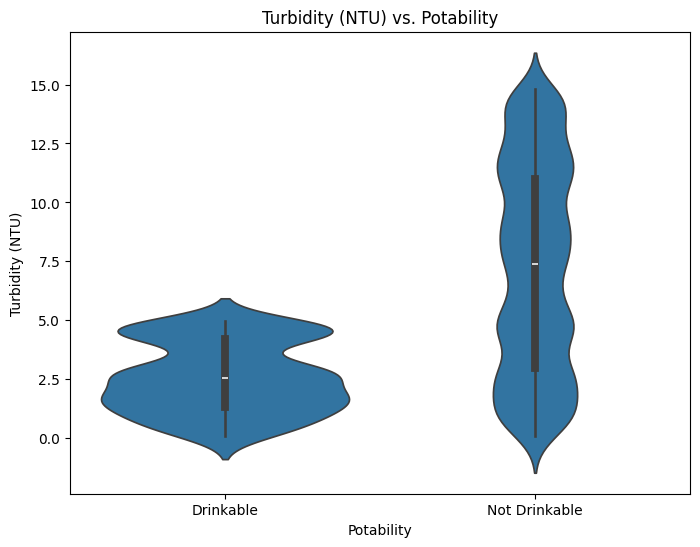

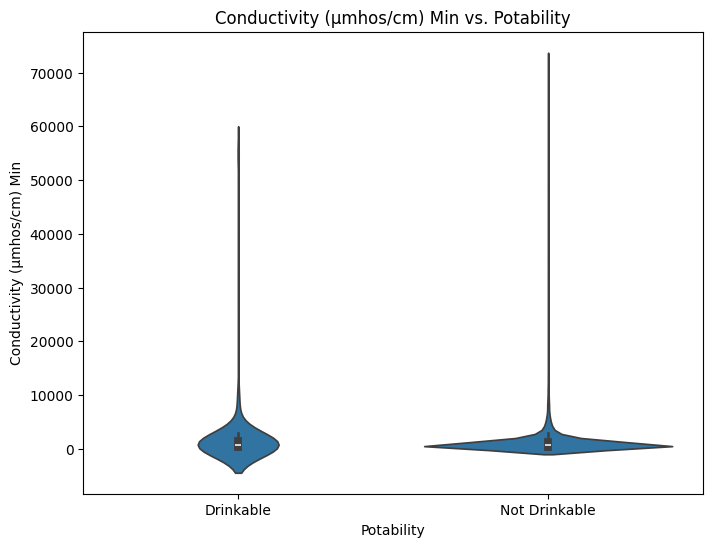

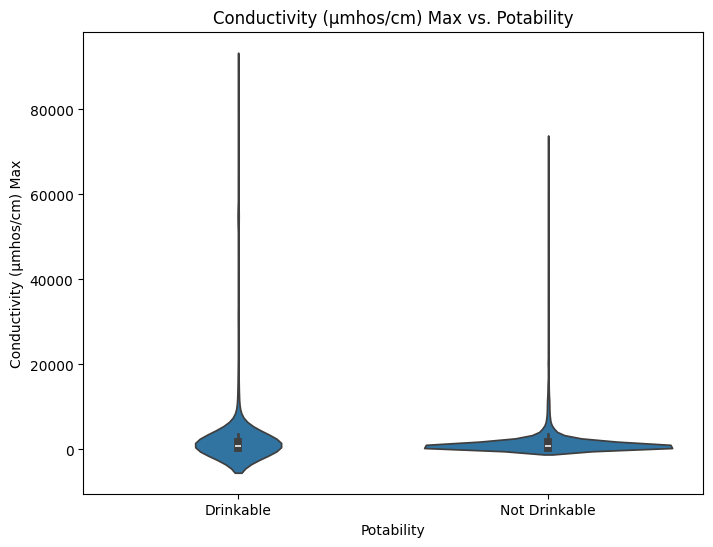

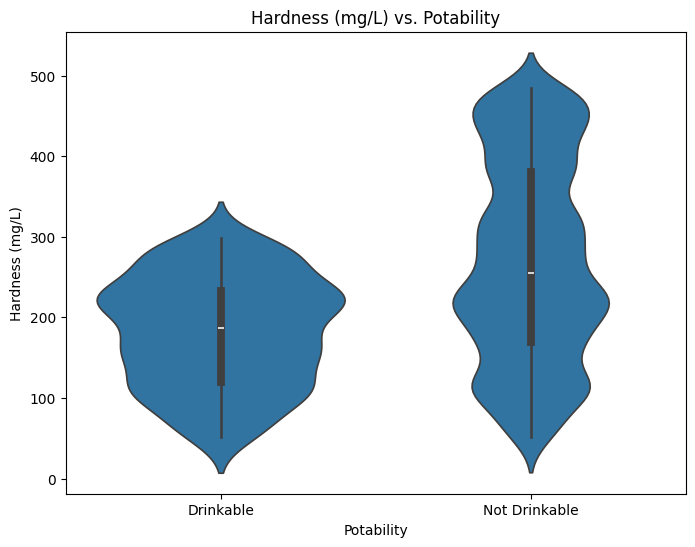

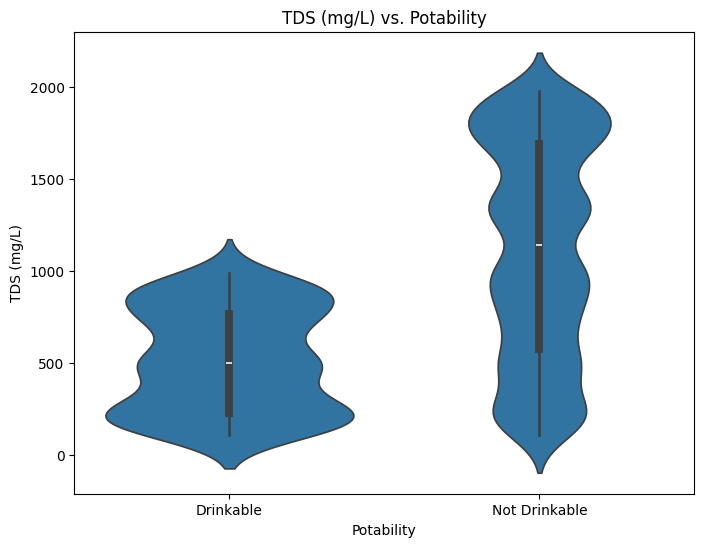

In [22]:
# prompt: give a best plotting technique which compares each attribute to potability other than histplot and boxplot

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Dataset' and 'selected_data' are defined as in the previous code.

# Create a list of attributes to compare with potability
attributes = ['pH Min', 'pH Max', 'Turbidity (NTU)', 'Conductivity (µmhos/cm) Min',
              'Conductivity (µmhos/cm) Max', 'Hardness (mg/L)', 'TDS (mg/L)']

# Plotting using violinplots
for attribute in attributes:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.violinplot(x='Potability', y=attribute, data=Dataset)
    plt.title(f'{attribute} vs. Potability')
    plt.xlabel('Potability')
    plt.ylabel(attribute)
    plt.show()

In [23]:
#correlation with heatmap to interpret the relation and multicolliniarity
corr =selected_data.corr()
corr

,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L)
Temperature Min,1.000000,0.830448,0.123377,0.013942,0.089000,0.073487,0.009061,0.009368,-0.000166,-0.003191,0.011672
Temperature Max,0.830448,1.000000,0.081674,0.015695,0.065954,0.072768,-0.012094,0.019866,-0.010335,0.006327,-0.003233
pH Min,0.123377,0.081674,1.000000,0.070006,0.159941,0.163665,0.007405,0.000337,-0.010276,-0.017512,-0.001897
pH Max,0.013942,0.015695,0.070006,1.000000,0.013070,0.014312,0.002247,-0.019785,0.013073,-0.002856,0.000642
Conductivity (µmhos/cm) Min,0.089000,0.065954,0.159941,0.013070,1.000000,0.909731,-0.003163,0.027068,-0.015542,-0.014877,-0.009364
Conductivity (µmhos/cm) Max,0.073487,0.072768,0.163665,0.014312,0.909731,1.000000,0.001569,0.029100,-0.012572,-0.015586,-0.009966
Turbidity (NTU),0.009061,-0.012094,0.007405,0.002247,-0.003163,0.001569,1.000000,0.009649,-0.004839,0.009203,0.016756
Dissolved Oxygen (mg/L),0.009368,0.019866,0.000337,-0.019785,0.027068,0.029100,0.009649,1.000000,-0.006262,-0.000074,0.024323
BOD (mg/L),-0.000166,-0.010335,-0.010276,0.013073,-0.015542,-0.012572,-0.004839,-0.006262,1.000000,0.011733,0.000750
TDS (mg/L),-0.003191,0.006327,-0.017512,-0.002856,-0.014877,-0.015586,0.009203,-0.000074,0.011733,1.000000,-0.004154


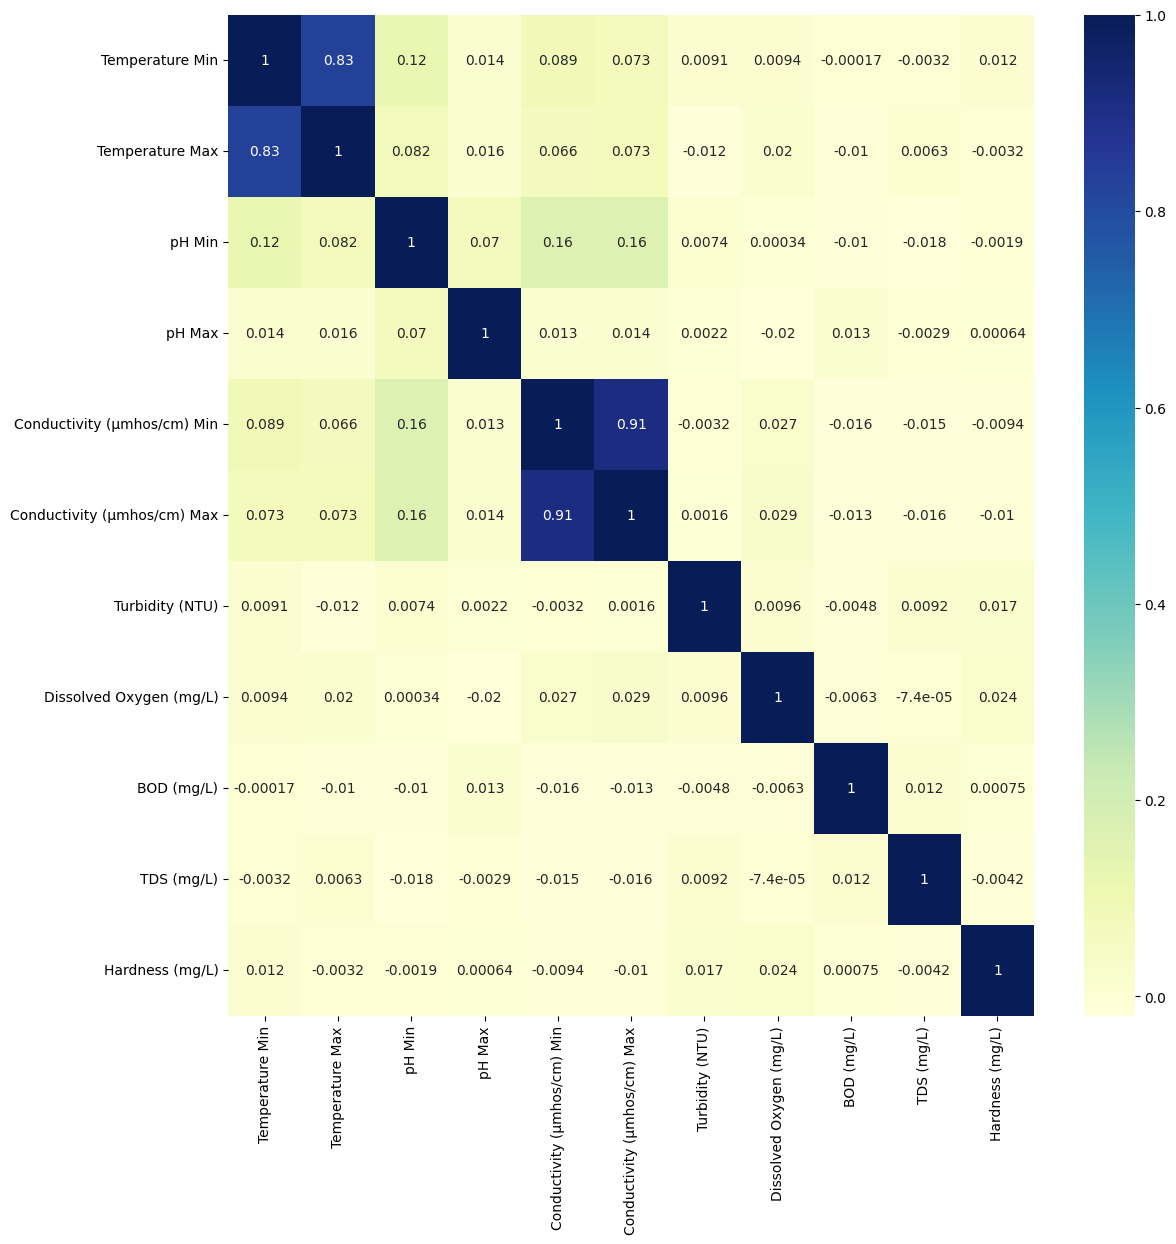

In [24]:
plt.figure(figsize=(13,13))
sns.heatmap(corr, annot=True, cmap="YlGnBu") # Change 'YlGnBu' to your desired colormap
plt.show()

##MISSING VALUE TREATMENT

In [25]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [26]:
columns_to_impute = ['Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']

# Apply median imputation for each column
for column in columns_to_impute:
    median_value = Dataset[column].median()
    Dataset[column].fillna(median_value)

In [27]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,498
Temperature Max,498
pH Min,121
pH Max,121
Conductivity (µmhos/cm) Min,192
Conductivity (µmhos/cm) Max,192


In [28]:
import pandas as pd
from sklearn.impute import KNNImputer

knn_impute = ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
                     'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']

# Create a KNNImputer instance (using k=5 as a common choice)
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputation only to the specified columns
Dataset[knn_impute] = imputer.fit_transform(Dataset[knn_impute])


In [29]:
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,76
Station Name,49
STATE,75
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [30]:
Dataset = Dataset.dropna(subset=['Station Code'])
Dataset.isnull().sum()

,0
Unnamed: 0,0
Station Code,0
Station Name,0
STATE,0
Temperature Min,0
Temperature Max,0
pH Min,0
pH Max,0
Conductivity (µmhos/cm) Min,0
Conductivity (µmhos/cm) Max,0


In [31]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable


##Handling Outliers

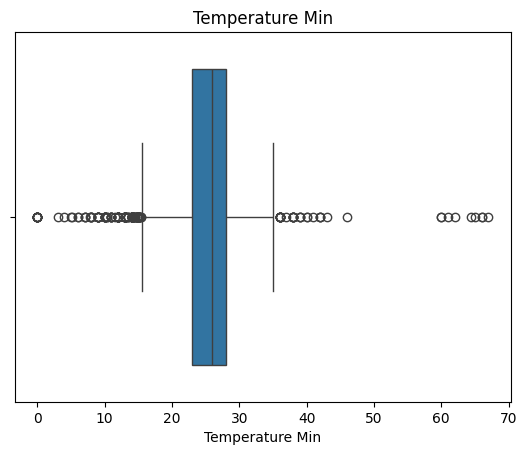

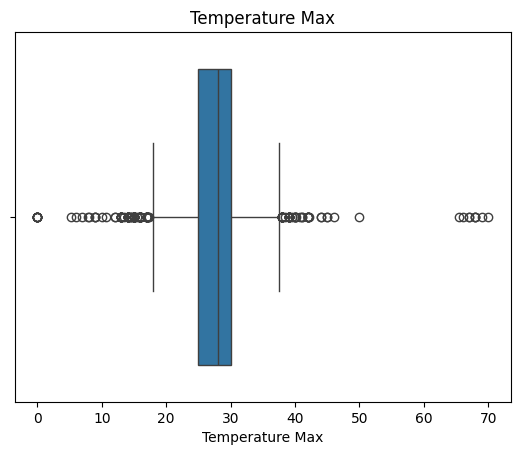

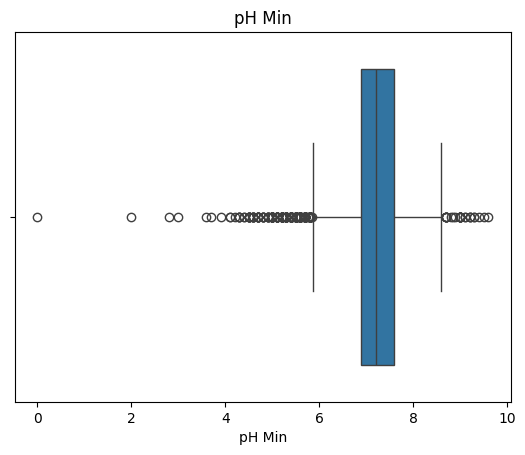

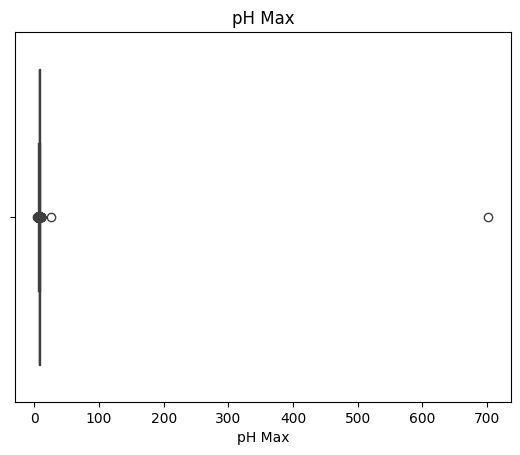

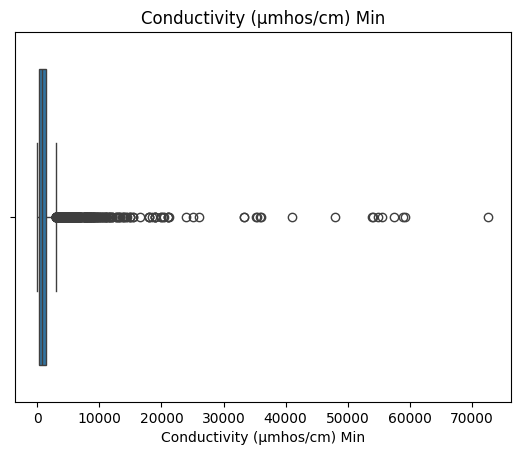

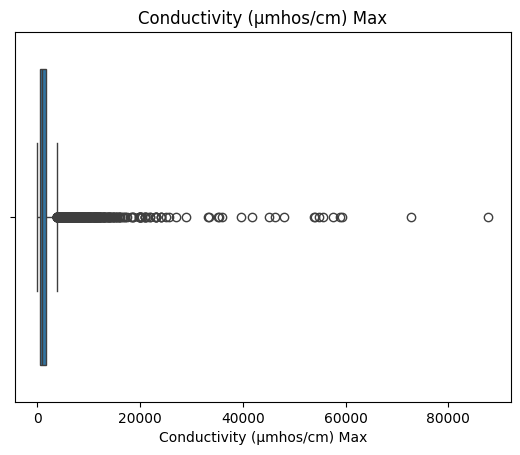

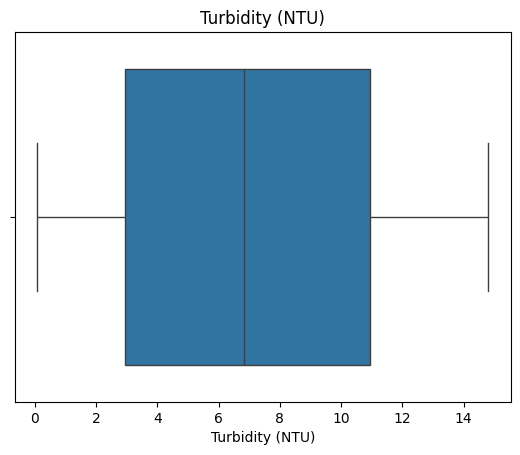

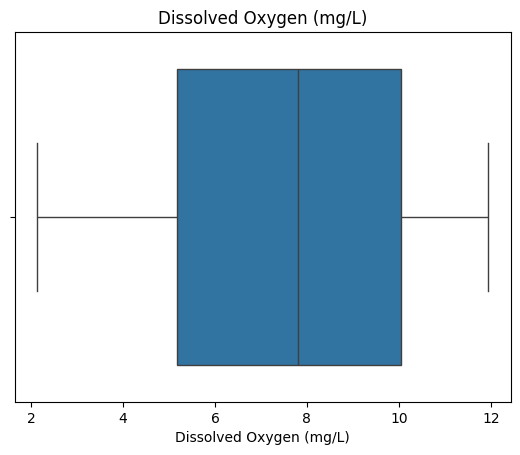

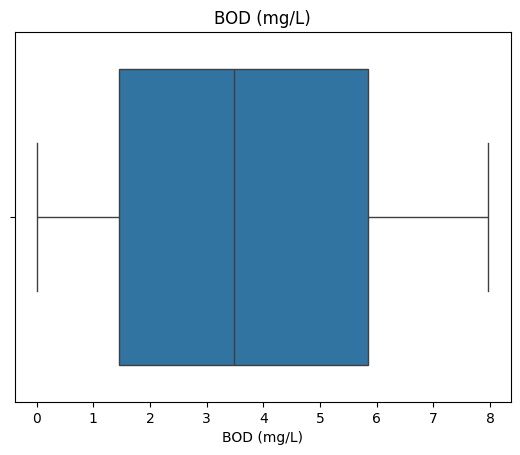

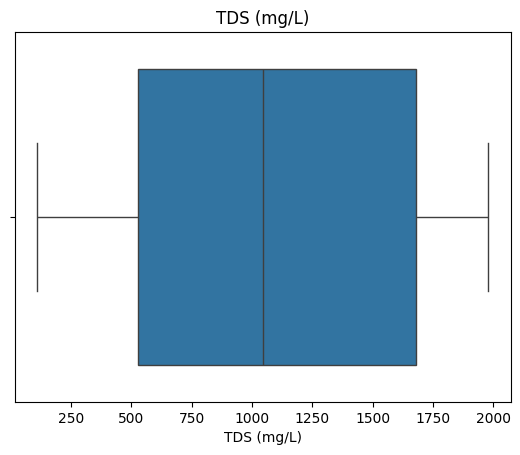

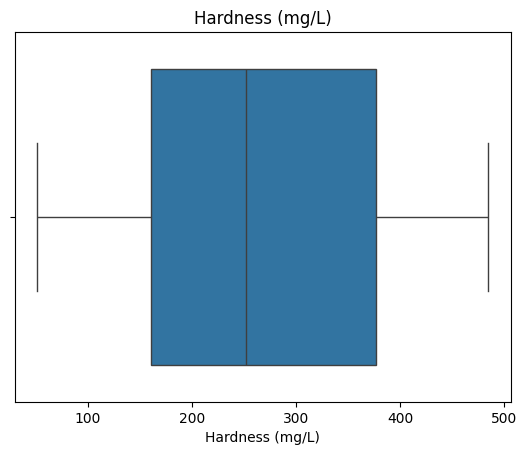

In [32]:
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

In [33]:
def wisker(col):
  q1,q3 = np.percentile(col,[25,75])
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  return lower_bound,upper_bound

In [34]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'STATE',
       'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
       'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max', 'Year',
       'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)',
       'TDS (mg/L)', 'Hardness (mg/L)', 'Potability'],
      dtype='object')

In [35]:


for i in ['Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
          'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']:
    lower_bound, upper_bound = wisker(Dataset[i])

    # Use .loc to limit values to within the whisker range
    Dataset.loc[Dataset[i] > upper_bound, i] = upper_bound
    Dataset.loc[Dataset[i] < lower_bound, i] = lower_bound


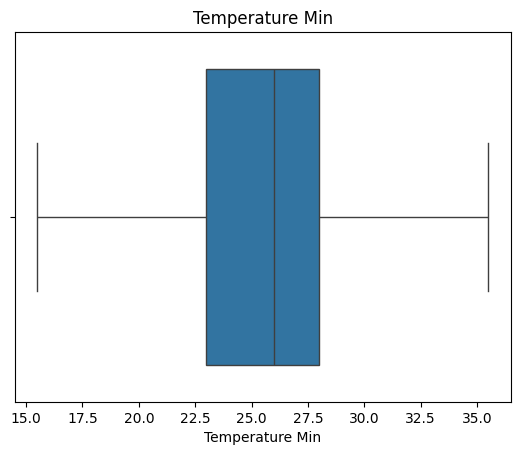

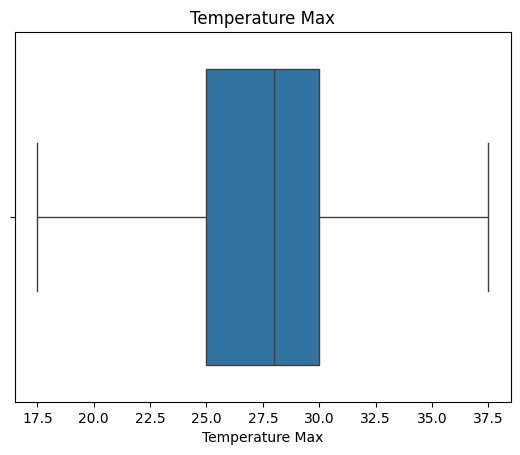

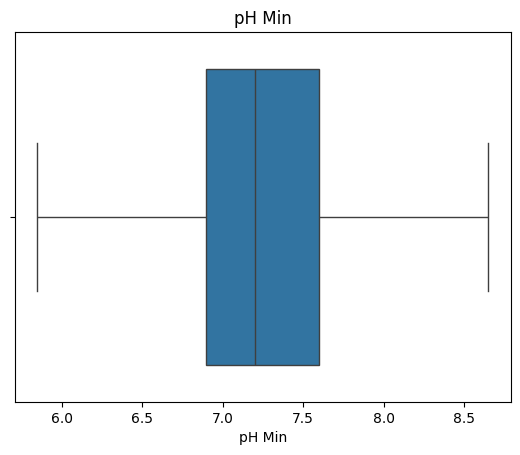

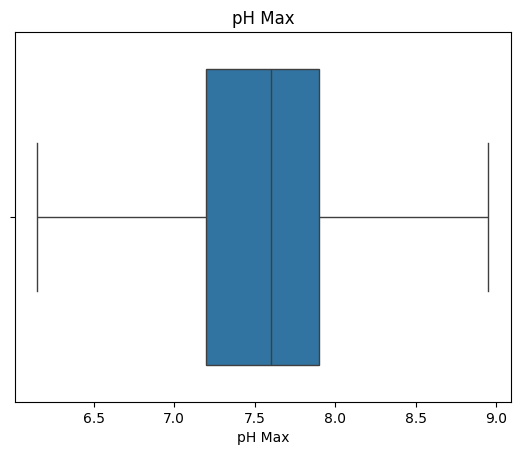

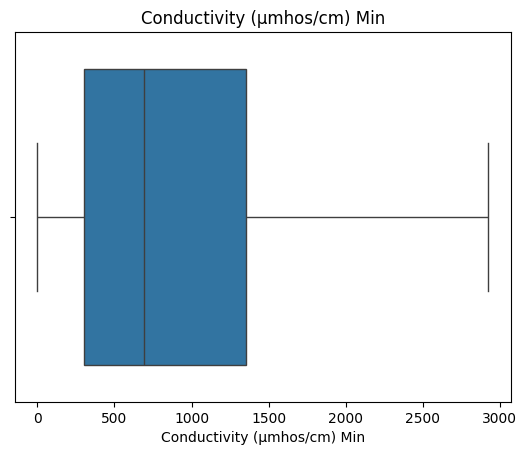

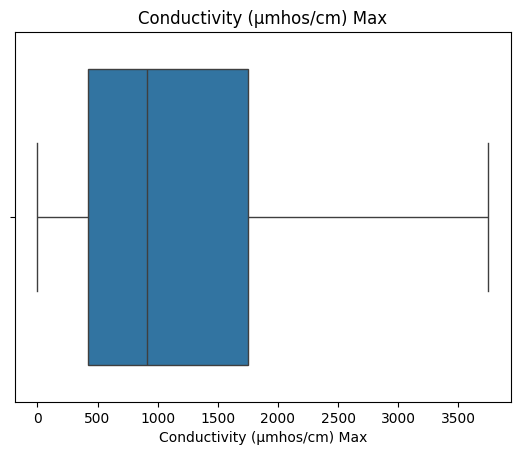

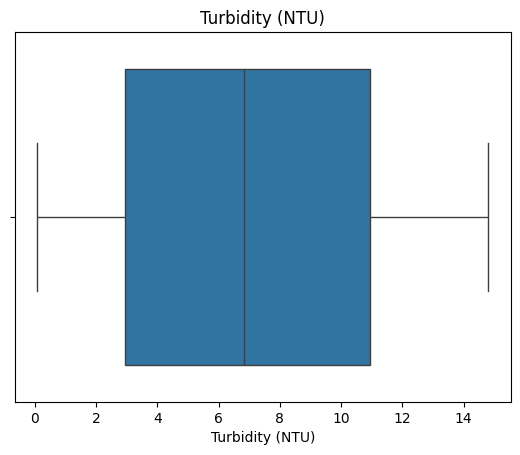

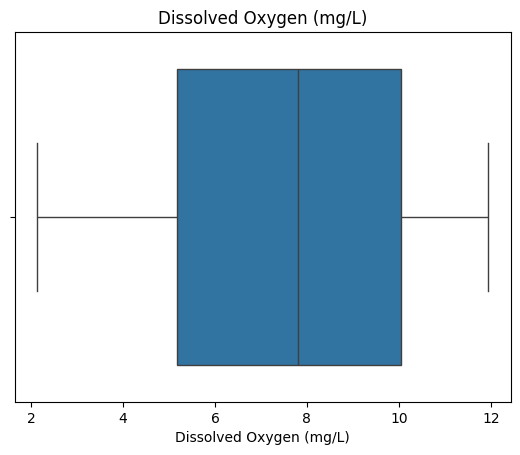

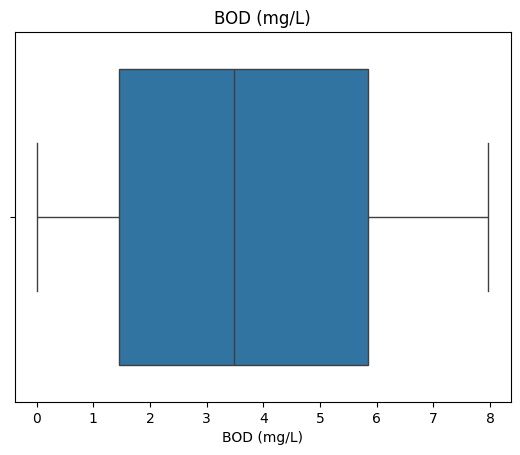

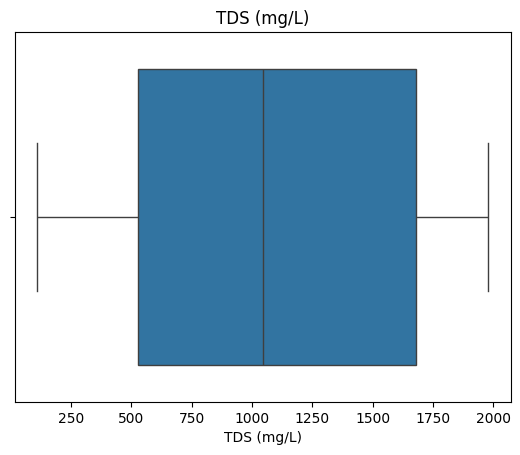

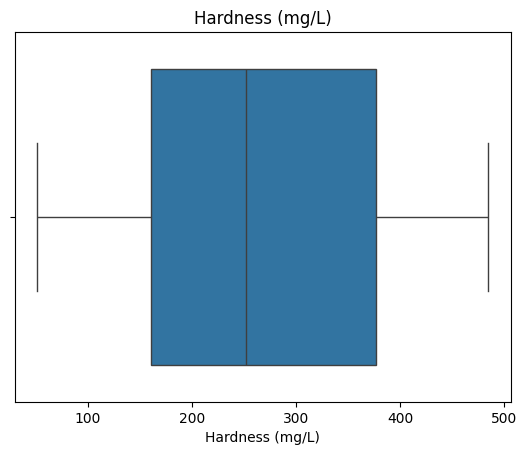

In [36]:
for i in selected_data.columns:
  sns.boxplot(data=Dataset,x=i)
  plt.title(i)
  plt.show()

##Added columns like Temperature Mean,pH Mean and Conductivity Mean

In [37]:
Dataset = Dataset.assign(
       pH_Mean=(Dataset['pH Min'] + Dataset['pH Max']) / 2,
       Conductivity_Mean=(Dataset['Conductivity (µmhos/cm) Min'] + Dataset['Conductivity (µmhos/cm) Max']) / 2,
       Temperature_Mean=(Dataset['Temperature Min'] + Dataset['Temperature Max']) / 2
   )


In [38]:
Dataset

,Unnamed: 0,Station Code,Station Name,STATE,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),Potability,pH_Mean,Conductivity_Mean,Temperature_Mean
0,0,15.0,"WELL AT KUYYURA, A.P.",ANDHRA PRADESH,23.0,28.0,6.82,7.85,195.0,226.0,2012,4.070235,10.134345,0.962008,578.810775,104.950680,Drinkable,7.335,210.5,25.5
1,1,16.0,WELL AT TADAVAI A.P.,ANDHRA PRADESH,27.0,28.0,7.21,7.72,663.0,1121.0,2012,11.564508,10.595564,7.927889,529.066337,205.746813,Not Drinkable,7.465,892.0,27.5
2,2,26.0,"WELL AT VIJAYWADA, A.P.",ANDHRA PRADESH,26.0,32.0,7.19,7.39,1601.0,1661.0,2012,14.543769,10.297229,1.070086,920.225147,217.964732,Not Drinkable,7.290,1631.0,29.0
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",ANDHRA PRADESH,26.0,27.0,7.82,8.80,1420.0,1668.0,2012,11.564508,10.297229,6.486625,1198.784496,182.125474,Not Drinkable,8.310,1544.0,26.5
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",ANDHRA PRADESH,25.0,30.0,6.80,7.11,1454.0,1575.0,2012,10.979909,3.262711,6.434438,1043.741646,123.066151,Not Drinkable,6.955,1514.5,27.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,WEST BENGAL,27.0,30.0,7.20,7.90,358.0,651.0,2021,7.840992,8.334117,6.326797,723.104180,472.638138,Not Drinkable,7.550,504.5,28.5
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",WEST BENGAL,28.0,31.0,7.30,7.40,1435.0,1730.0,2021,4.675666,NaN,5.193830,230.164378,234.763384,Not Drinkable,7.350,1582.5,29.5
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",WEST BENGAL,29.0,31.0,7.30,7.30,1705.0,1921.0,2021,6.479175,5.978842,6.091671,920.225147,123.066151,Not Drinkable,7.300,1813.0,30.0
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,WEST BENGAL,26.0,30.0,7.20,7.60,909.0,1090.0,2021,1.465082,8.737017,6.525324,480.030896,373.339982,Not Drinkable,7.400,999.5,28.0


#DATA VISUALIZATION


# Assuming your data is loaded into a DataFrame called 'df'
# Replace this with your actual data loading code
# df = pd.read_csv('your_dataset.csv')

<Figure size 1200x600 with 0 Axes>

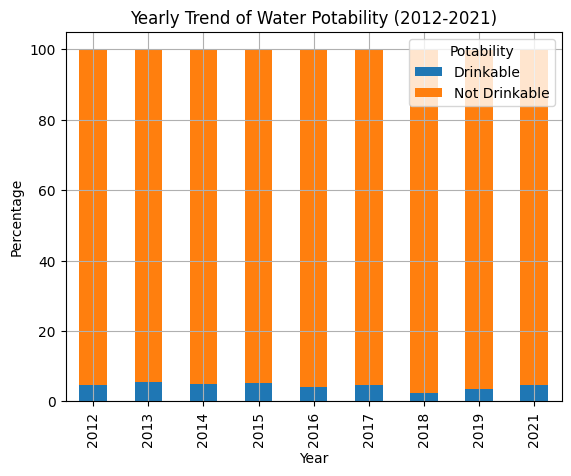

In [39]:




    # 1. Yearly Trend of Water Potability
    plt.figure(figsize=(12, 6))
    yearly_potability = Dataset.groupby(['Year', 'Potability']).size().unstack()
    yearly_potability_pct = yearly_potability.div(yearly_potability.sum(axis=1), axis=0) * 100
    yearly_potability_pct.plot(kind='bar', stacked=True)
    plt.title('Yearly Trend of Water Potability (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('Percentage')
    plt.legend(title='Potability')
    plt.grid(True)
    plt.show()




**Year-wise Quality Trend:**


1.Reveals long-term trends in water quality
2.Shows effectiveness of water management policies
3.Identifies periods of quality improvement or deterioration
4.Helps in future water quality predictions





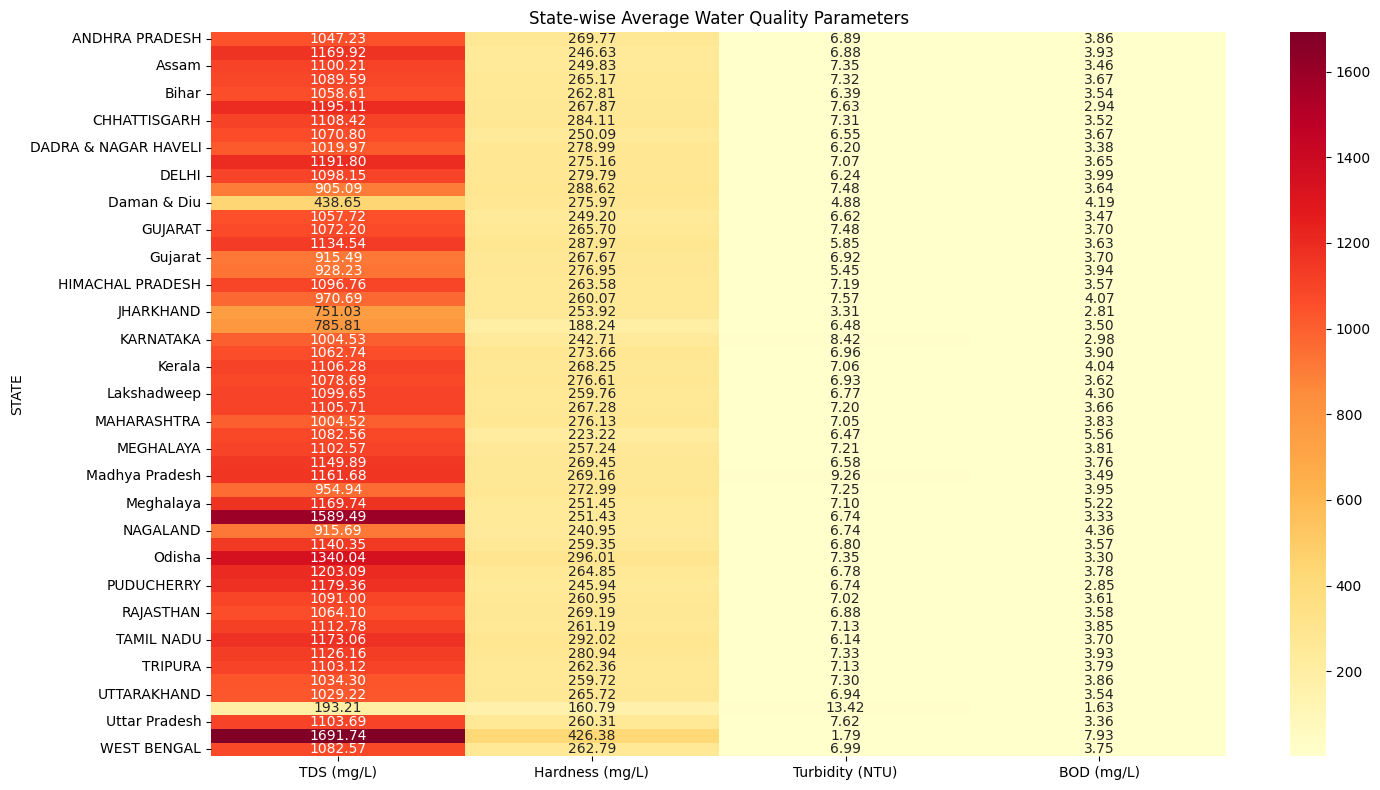

In [40]:
 # 2. State-wise Water Quality Heatmap
plt.figure(figsize=(15, 8)) # Removed extra indentation here
state_params = Dataset.groupby('STATE')[['TDS (mg/L)', 'Hardness (mg/L)', 'Turbidity (NTU)', 'BOD (mg/L)']].mean()
sns.heatmap(state_params, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('State-wise Average Water Quality Parameters')
plt.tight_layout()
plt.show()


***State-wise Quality Comparison:***


1.Compares overall water quality across states
2.Identifies states needing immediate intervention
3.Shows regional patterns in water quality
4.Useful for resource allocation

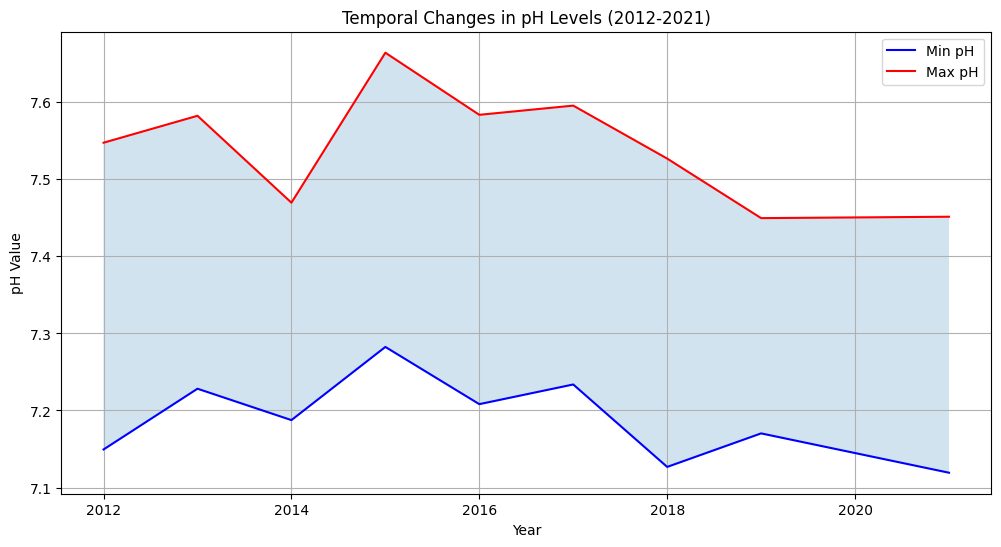

In [41]:
    # 3. Temporal Changes in pH Levels
    plt.figure(figsize=(12, 6))
    yearly_ph = Dataset.groupby('Year')[['pH Min', 'pH Max']].mean()
    plt.plot(yearly_ph.index, yearly_ph['pH Min'], 'b-', label='Min pH')
    plt.plot(yearly_ph.index, yearly_ph['pH Max'], 'r-', label='Max pH')
    plt.fill_between(yearly_ph.index, yearly_ph['pH Min'], yearly_ph['pH Max'], alpha=0.2)
    plt.title('Temporal Changes in pH Levels (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('pH Value')
    plt.legend()
    plt.grid(True)
    plt.show()

***pH Range Analysis:***


1.Shows state-wise variations in pH levels
2.Identifies states with concerning pH ranges
3.Helps in targeted pH treatment planning
4.Useful for ecological impact assessment

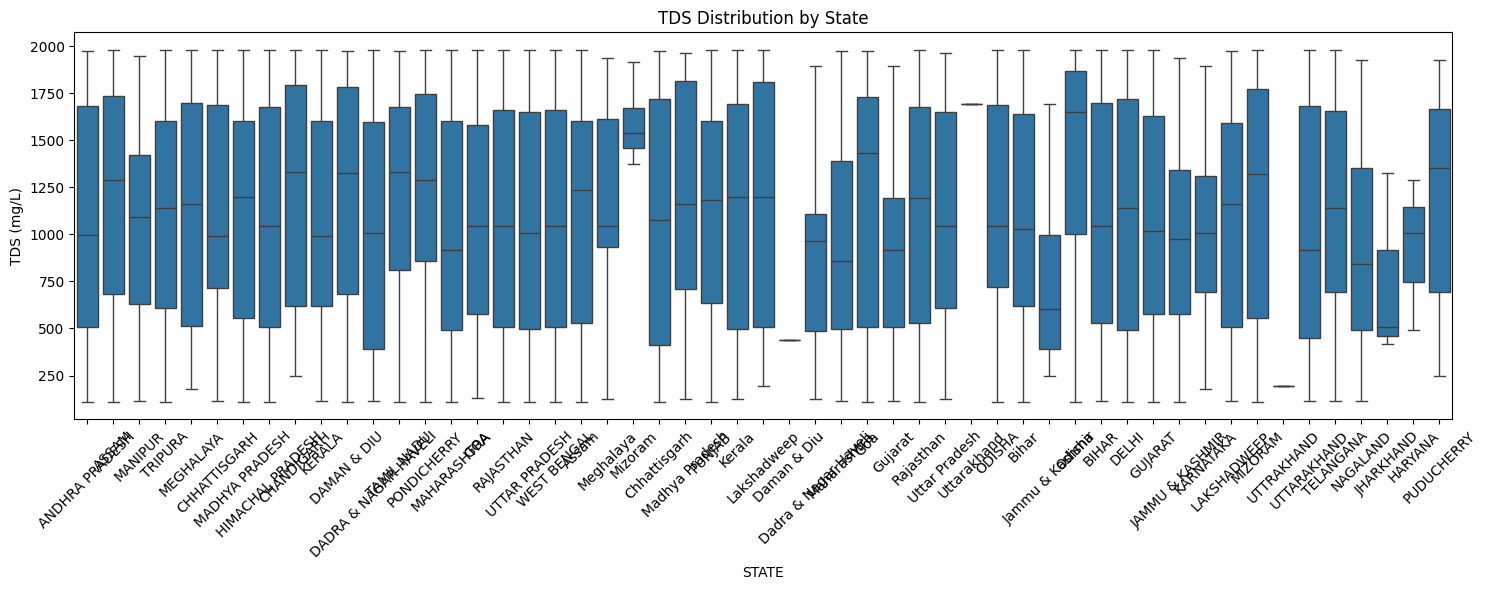

In [42]:
    # 4. Box Plot of TDS Distribution by State
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='STATE', y='TDS (mg/L)', data=Dataset)
    plt.xticks(rotation=45)
    plt.title('TDS Distribution by State')
    plt.tight_layout()
    plt.show()


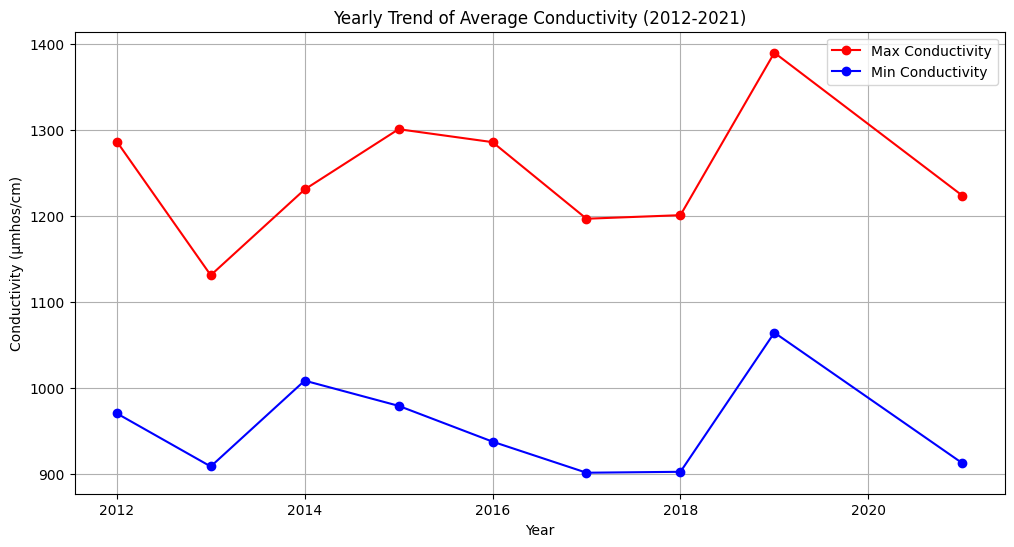

In [43]:
    # 5. Yearly Trend of Average Conductivity
    plt.figure(figsize=(12, 6))
    yearly_conductivity = Dataset.groupby('Year')[['Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max']].mean()
    plt.plot(yearly_conductivity.index, yearly_conductivity['Conductivity (µmhos/cm) Max'],
             'ro-', label='Max Conductivity')
    plt.plot(yearly_conductivity.index, yearly_conductivity['Conductivity (µmhos/cm) Min'],
             'bo-', label='Min Conductivity')
    plt.title('Yearly Trend of Average Conductivity (2012-2021)')
    plt.xlabel('Year')
    plt.ylabel('Conductivity (μmhos/cm)')
    plt.legend()
    plt.grid(True)
    plt.show()

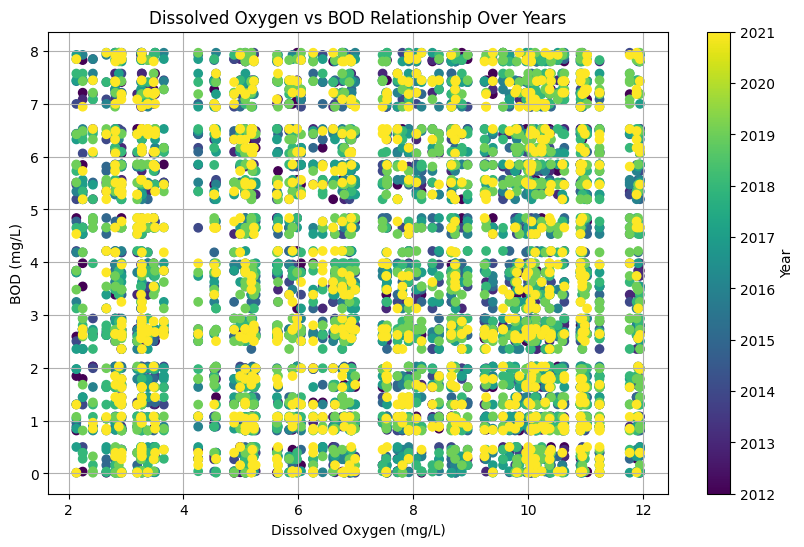

In [45]:
    # 6. Dissolved Oxygen vs BOD Scatter Plot with Year Color Coding
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(Dataset['Dissolved Oxygen (mg/L)'], Dataset['BOD (mg/L)'],
                         c=Dataset['Year'], cmap='viridis')
    plt.colorbar(scatter, label='Year')
    plt.xlabel('Dissolved Oxygen (mg/L)')
    plt.ylabel('BOD (mg/L)')
    plt.title('Dissolved Oxygen vs BOD Relationship Over Years')
    plt.grid(True)
    plt.show()

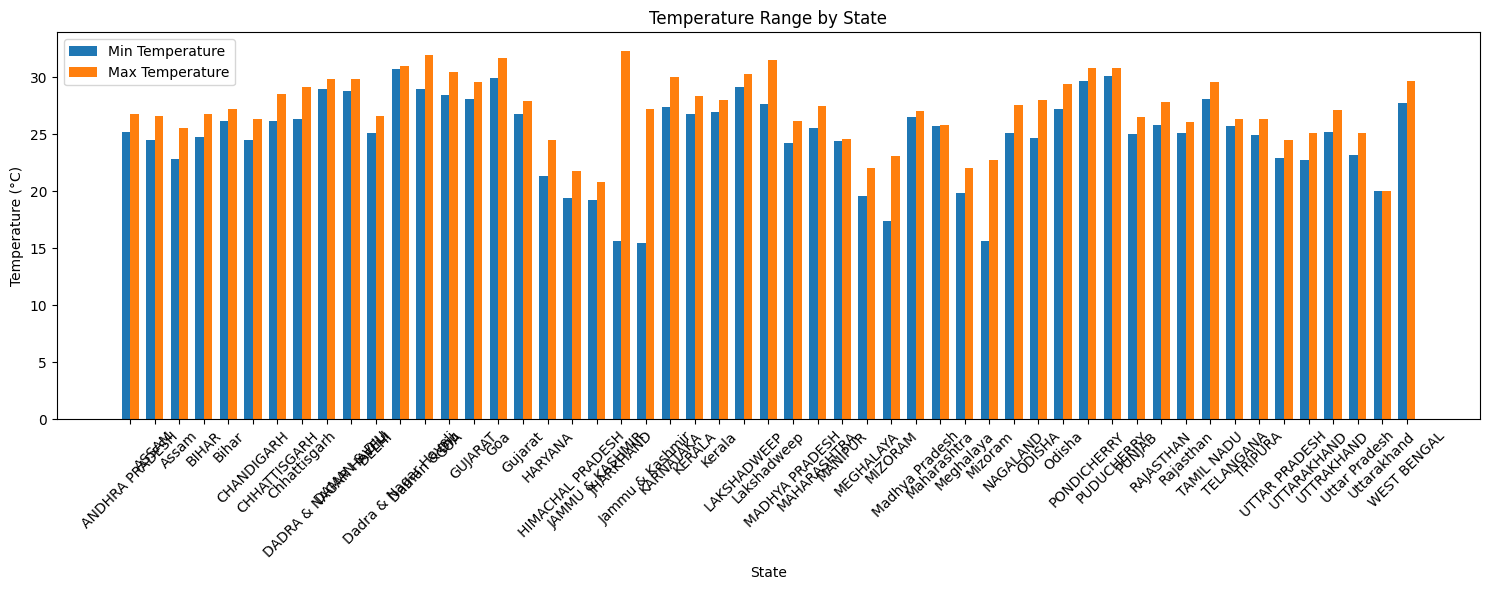

In [46]:
    # 7. Temperature Range by State and Season
    plt.figure(figsize=(15, 6))
    state_temp = Dataset.groupby('STATE')[['Temperature Min', 'Temperature Max']].mean()
    x = np.arange(len(state_temp.index))
    width = 0.35
    plt.bar(x - width/2, state_temp['Temperature Min'], width, label='Min Temperature')
    plt.bar(x + width/2, state_temp['Temperature Max'], width, label='Max Temperature')
    plt.xlabel('State')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Range by State')
    plt.xticks(x, state_temp.index, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

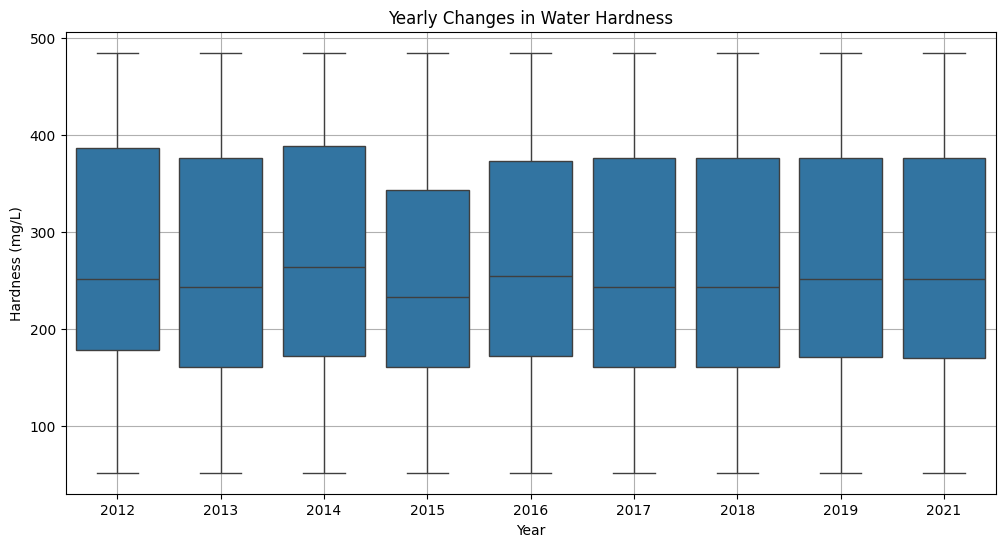

In [48]:
    # 8. Yearly Changes in Water Hardness
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Year', y='Hardness (mg/L)', data=Dataset)
    plt.title('Yearly Changes in Water Hardness')
    plt.xlabel('Year')
    plt.ylabel('Hardness (mg/L)')
    plt.grid(True)
    plt.show()

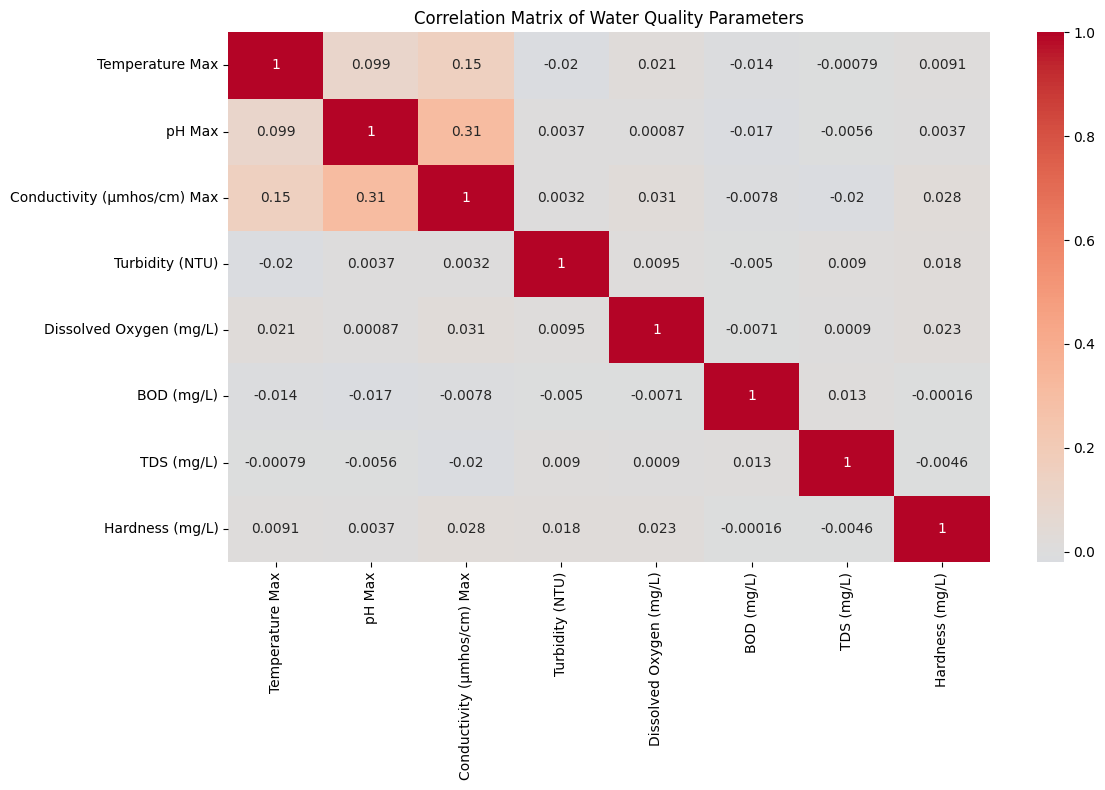

In [53]:
# 9. Correlation Matrix Over Time
plt.figure(figsize=(12, 8))
numeric_cols = ['Temperature Max', 'pH Max', 'Conductivity (µmhos/cm) Max',
               'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)']
# Replacing 'df' with 'Dataset' to access the DataFrame containing the data
correlation = Dataset[numeric_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Water Quality Parameters')
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

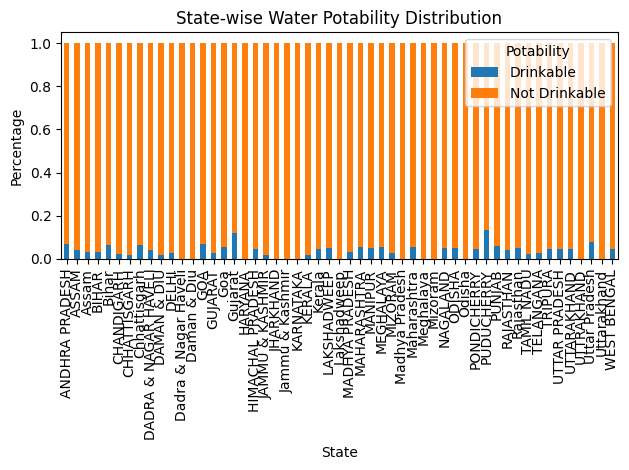

In [55]:
    # 10. State-wise Potability Analysis
    plt.figure(figsize=(15, 6))
    state_potability = Dataset.groupby('STATE')['Potability'].value_counts(normalize=True).unstack()
    state_potability.plot(kind='bar', stacked=True)
    plt.title('State-wise Water Potability Distribution')
    plt.xlabel('State')
    plt.ylabel('Percentage')
    plt.legend(title='Potability')
    plt.tight_layout()
    plt.show()

#ENCODING

#One-hot encode the 'State' column

In [ ]:
Dataset['STATE'] = Dataset['STATE'].str.replace('Uttrakhand', 'Uttarakhand', case=False)

In [ ]:
Dataset['STATE'] = Dataset['STATE'].str.title().str.strip()

In [ ]:
Dataset = pd.get_dummies(Dataset, columns=["STATE"], drop_first=True)
Dataset

,Unnamed: 0,Station Code,Station Name,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,...,STATE_Pondicherry,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal
0,0,15.0,"WELL AT KUYYURA, A.P.",23.0,28.0,6.82,7.85,195.0,226.0,2012,...,False,False,False,False,False,False,False,False,False,False
1,1,16.0,WELL AT TADAVAI A.P.,27.0,28.0,7.21,7.72,663.0,1121.0,2012,...,False,False,False,False,False,False,False,False,False,False
2,2,26.0,"WELL AT VIJAYWADA, A.P.",26.0,32.0,7.19,7.39,1601.0,1661.0,2012,...,False,False,False,False,False,False,False,False,False,False
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",26.0,27.0,7.82,8.80,1420.0,1668.0,2012,...,False,False,False,False,False,False,False,False,False,False
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",25.0,30.0,6.80,7.11,1454.0,1575.0,2012,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,27.0,30.0,7.20,7.90,358.0,651.0,2021,...,False,False,False,False,False,False,False,False,False,True
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",28.0,31.0,7.30,7.40,1435.0,1730.0,2021,...,False,False,False,False,False,False,False,False,False,True
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",29.0,31.0,7.30,7.30,1705.0,1921.0,2021,...,False,False,False,False,False,False,False,False,False,True
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,26.0,30.0,7.20,7.60,909.0,1090.0,2021,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
Dataset.columns

Index(['Unnamed: 0', 'Station Code', 'Station Name', 'Temperature Min',
       'Temperature Max', 'pH Min', 'pH Max', 'Conductivity (µmhos/cm) Min',
       'Conductivity (µmhos/cm) Max', 'Year', 'Turbidity (NTU)',
       'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)',
       'Hardness (mg/L)', 'Potability', 'pH_Mean', 'Conductivity_Mean',
       'Temperature_Mean', 'STATE_Assam', 'STATE_Bihar', 'STATE_Chandigarh',
       'STATE_Chhattisgarh', 'STATE_Dadra & Nagar Haveli', 'STATE_Daman & Diu',
       'STATE_Delhi', 'STATE_Goa', 'STATE_Gujarat', 'STATE_Haryana',
       'STATE_Himachal Pradesh', 'STATE_Jammu & Kashmir', 'STATE_Jharkhand',
       'STATE_Karnataka', 'STATE_Kerala', 'STATE_Lakshadweep',
       'STATE_Madhya Pradesh', 'STATE_Maharashtra', 'STATE_Manipur',
       'STATE_Meghalaya', 'STATE_Mizoram', 'STATE_Nagaland', 'STATE_Odisha',
       'STATE_Pondicherry', 'STATE_Puducherry', 'STATE_Punjab',
       'STATE_Rajasthan', 'STATE_Tamil Nadu', 'STATE_Telangana',
       'STA

#Encoding Potability

In [ ]:
Dataset['Potability'] = Dataset['Potability'].map({'Drinkable': 1, 'Not Drinkable': 0})
Dataset

,Unnamed: 0,Station Code,Station Name,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Year,...,STATE_Pondicherry,STATE_Puducherry,STATE_Punjab,STATE_Rajasthan,STATE_Tamil Nadu,STATE_Telangana,STATE_Tripura,STATE_Uttar Pradesh,STATE_Uttarakhand,STATE_West Bengal
0,0,15.0,"WELL AT KUYYURA, A.P.",23.0,28.0,6.82,7.85,195.0,226.0,2012,...,False,False,False,False,False,False,False,False,False,False
1,1,16.0,WELL AT TADAVAI A.P.,27.0,28.0,7.21,7.72,663.0,1121.0,2012,...,False,False,False,False,False,False,False,False,False,False
2,2,26.0,"WELL AT VIJAYWADA, A.P.",26.0,32.0,7.19,7.39,1601.0,1661.0,2012,...,False,False,False,False,False,False,False,False,False,False
3,3,27.0,"WELL AT PEDDAVOORA, A.P.",26.0,27.0,7.82,8.80,1420.0,1668.0,2012,...,False,False,False,False,False,False,False,False,False,False
4,4,1513.0,"B W. - KRISHNA MURTHY, D.NO. 48-16-43 AUTONAGA...",25.0,30.0,6.80,7.11,1454.0,1575.0,2012,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6311,983,2533.0,SURI TOWN NEAR BUS STAND,27.0,30.0,7.20,7.90,358.0,651.0,2021,...,False,False,False,False,False,False,False,False,False,True
6312,984,1773.0,"TANGRA, CALCUTTA , WEST\nBENGAL",28.0,31.0,7.30,7.40,1435.0,1730.0,2021,...,False,False,False,False,False,False,False,False,False,True
6313,985,1774.0,"TOPSIA CALCUTTA, WEST\nBENGAL",29.0,31.0,7.30,7.30,1705.0,1921.0,2021,...,False,False,False,False,False,False,False,False,False,True
6314,986,2546.0,ULUBERIA COLLEGE AT HOWRAH,26.0,30.0,7.20,7.60,909.0,1090.0,2021,...,False,False,False,False,False,False,False,False,False,True


#Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Select numerical columns for normalization, excluding identifiers or binary flags
numerical_columns = [
    'Temperature Min', 'Temperature Max', 'pH Min', 'pH Max',
    'Conductivity (µmhos/cm) Min', 'Conductivity (µmhos/cm) Max',
    'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'BOD (mg/L)', 'TDS (mg/L)', 'Hardness (mg/L)',
    'pH_Mean', 'Conductivity_Mean', 'Temperature_Mean'
]

# Initialize MinMaxScaler and normalize
scaler = MinMaxScaler()
Dataset[numerical_columns] = scaler.fit_transform(Dataset[numerical_columns])

# Confirm normalization by displaying the summary statistics
Dataset[numerical_columns].describe()


,Temperature Min,Temperature Max,pH Min,pH Max,Conductivity (µmhos/cm) Min,Conductivity (µmhos/cm) Max,Turbidity (NTU),Dissolved Oxygen (mg/L),BOD (mg/L),TDS (mg/L),Hardness (mg/L),pH_Mean,Conductivity_Mean,Temperature_Mean
count,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000,6180.000000,6179.000000,6183.000000,6179.000000,6182.000000,6240.000000,6240.000000,6240.000000
mean,0.489270,0.483172,0.476348,0.493473,0.326079,0.334767,0.472508,0.543484,0.466136,0.522443,0.493906,0.484910,0.330959,0.486221
std,0.197415,0.189779,0.218009,0.208008,0.284754,0.285178,0.300415,0.292577,0.306223,0.315516,0.286381,0.200421,0.277577,0.184261
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.375000,0.375000,0.375000,0.102564,0.112567,0.194077,0.310512,0.179880,0.223851,0.252559,0.375000,0.112079,0.387500
50%,0.525000,0.525000,0.482143,0.517857,0.236581,0.242073,0.459103,0.578524,0.435914,0.499273,0.461544,0.500000,0.242962,0.525000
75%,0.625000,0.625000,0.625000,0.625000,0.461538,0.467540,0.737834,0.807188,0.733394,0.839004,0.750499,0.625000,0.467495,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##Data Visualization